In [96]:
import os

base_dir = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
data_dir = os.path.join(base_dir,'data')
raw_data_dir = os.path.join(data_dir,'raw')

import pandas as pd

df_items = pd.read_json(os.path.join(raw_data_dir,'items.json'), lines=True) \
                                    .drop('salesRank',axis=1)
df_items[['id']] = df_items[['id']].astype(int)

df_ratings = pd.read_csv(os.path.join(raw_data_dir,'ratings.csv'), sep=',', header=0)

print(df_ratings.info())
print(df_items.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53258 entries, 0 to 53257
Data columns (total 3 columns):
user      53258 non-null int64
item      53258 non-null int64
rating    53258 non-null float64
dtypes: float64(1), int64(2)
memory usage: 1.2 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2420 entries, 0 to 2419
Data columns (total 9 columns):
asin            2420 non-null object
availability    2420 non-null float64
brand           1939 non-null object
categories      2420 non-null object
description     2381 non-null object
id              2420 non-null int32
imUrl           2420 non-null object
name            2417 non-null object
price           2354 non-null float64
dtypes: float64(2), int32(1), object(6)
memory usage: 160.8+ KB
None


In [97]:
assert df_items.shape[0] == len(df_ratings['item'].unique())

In [98]:
ratings_grp_by_items = df_ratings.groupby(df_ratings['item'], group_keys=False)
df_ratings_items_count = ratings_grp_by_items.count().drop(['user'], axis=1) \
                                .rename(index=str, columns={'rating':'count'}) \
                                .reset_index()
df_ratings_items_count[['item']] = df_ratings_items_count[['item']].astype(int)

df_items = df_items.set_index('id', verify_integrity=True) \
                    .join(df_ratings_items_count.set_index('item')) \
                    .reset_index()

### Price Levels Analysis

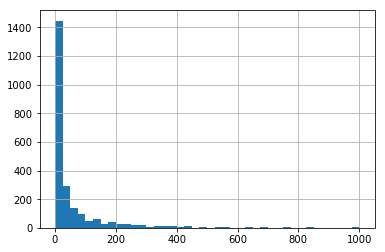

In [99]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

df_items['price'].hist(bins=40)

In [100]:
for i in range(1,5):
    j=0.25*i
    print("{}% quantile: {}".format(int(100*j), df_items['price'].quantile(j)))

25% quantile: 7.672499999999999
50% quantile: 15.465
75% quantile: 54.845
100% quantile: 999.99
